In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import experiment_helpers
import umap
from contrastive_loss import ContrastiveLoss
from my_umap import UMAP
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Notebook containing final experiments:
1. UMAP Experiments
2. tSNE Experiments
3. Diffusion Mapping Experiments
4. Comparative Experiments

1. UMAP experiments

Epochs vs. Quality

In [3]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins = penguins.dropna()
penguin_data = penguins[
[
    "culmen_length_mm",
    "culmen_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)
labels = [x for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]

Official Implementation:

In [7]:
x_vals = []
losses = []
myLoss = ContrastiveLoss(margin=5)
for i in range(0,100,5):
    x_vals.append(i)
    reducer = umap.UMAP(n_neighbors=15, n_epochs=i, verbose=False)
    embedding = reducer.fit_transform(scaled_penguin_data)
    losses.append(myLoss.get_loss(embedding, labels))

Text(0.5, 1.0, 'Epochs vs Contrastive Loss for UMAP')

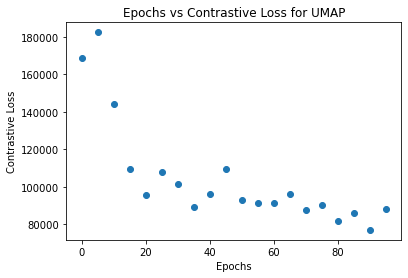

In [8]:
plot, axes = plt.subplots()
axes.scatter(x_vals, losses)

axes.set_xlabel('Epochs')
axes.set_ylabel('Contrastive Loss')  
axes.set_title("Epochs vs Contrastive Loss for UMAP")

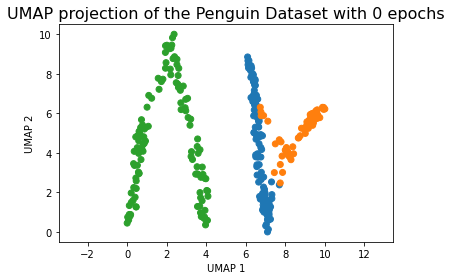

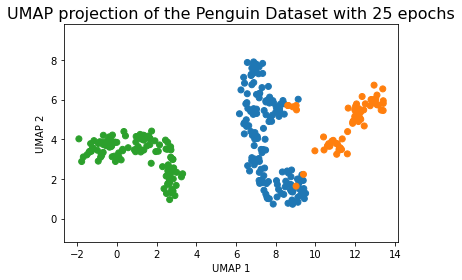

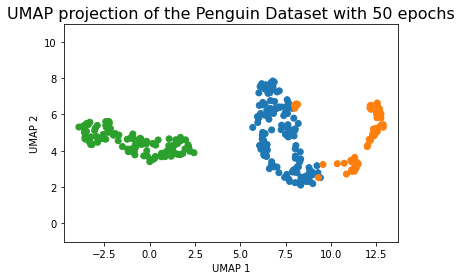

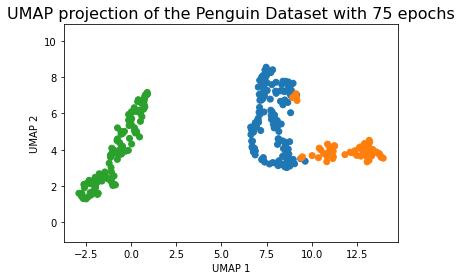

In [24]:
for i in range(0,100,25):
    reducer = umap.UMAP(n_neighbors=15, n_epochs=i, verbose=False, min_dist=.1)
    embedding = reducer.fit_transform(scaled_penguin_data)
    plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the Penguin Dataset with ' + str(i) + ' epochs', fontsize=16)
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.show()

Our Implementation:

In [25]:
x_vals = []
losses = []
myLoss = ContrastiveLoss(margin=5)
for i in range(0,100,5):
    x_vals.append(i)
    myUmap = UMAP(n_neighbors = 15, dims=2, min_dist=.1, epochs=i)
    myUmap.fit(scaled_penguin_data)
    embedding = myUmap.Y
    losses.append(myLoss.get_loss(embedding, labels))

/Users/daniel/Desktop/CP307/dimensional-reduction/my_umap.py:62: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.sqrt(diag_data), 0, graph.shape[0], graph.shape[0]


Text(0.5, 1.0, 'Epochs vs Contrastive Loss for UMAP')

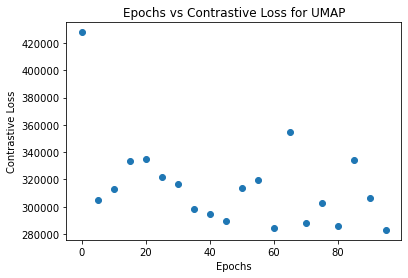

In [26]:
plot, axes = plt.subplots()
axes.scatter(x_vals, losses)

axes.set_xlabel('Epochs')
axes.set_ylabel('Contrastive Loss')  
axes.set_title("Epochs vs Contrastive Loss for UMAP")

/Users/daniel/Desktop/CP307/dimensional-reduction/my_umap.py:62: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.sqrt(diag_data), 0, graph.shape[0], graph.shape[0]


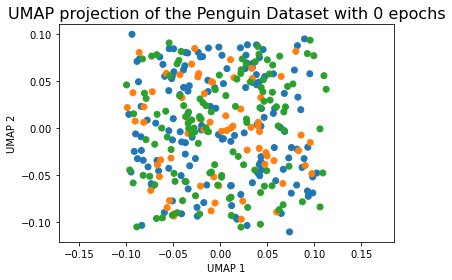

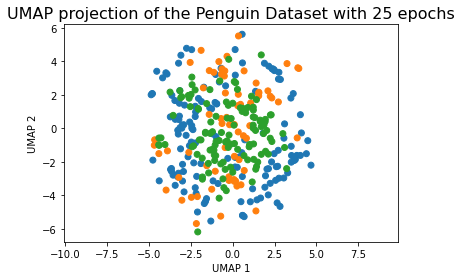

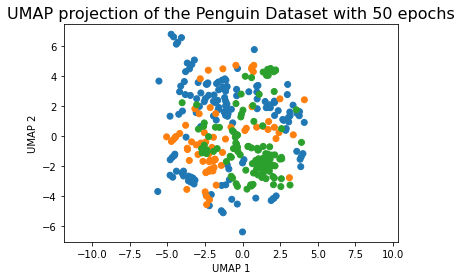

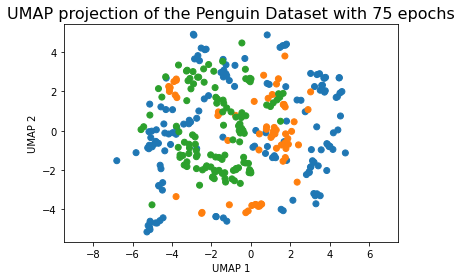

In [4]:

for i in range(0,100,25):
    myUmap = UMAP(n_neighbors = 15, dims=2, min_dist=.1, epochs=i)
    myUmap.fit(scaled_penguin_data)
    embedding = myUmap.Y
    plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the Penguin Dataset with ' + str(i) + ' epochs', fontsize=16)
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.show()

2. tSNE Experiments

3. Diffusion Mapping Experiments

4. Comparative Experiments

In [2]:
#training, test split
train_data, train_label, test_data, test_label = experiment_helpers.get_Data()

In [6]:
#constrastive loss instance
myLoss = ContrastiveLoss(margin=5)

Get Optimum parameters for UMAP on training data.

In [3]:
epochs, neighbors, min_dist, loss = experiment_helpers.umap_coordinate_descent(train_data,train_label)

Get Loss on test dataset with optimized values

In [8]:
reducer = umap.UMAP(n_neighbors=neighbors, n_epochs=epochs, verbose=False, min_dist=min_dist)
embedding = reducer.fit_transform(test_data)
myLoss.get_loss(embedding, test_label)

3043.8981680330667

Algorithm vs Loss Graph

Text(0, 0.5, 'Contrastive Loss')

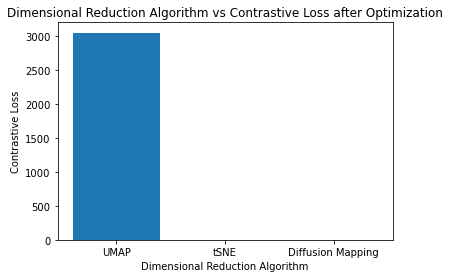

In [12]:
plt.bar(["UMAP", "tSNE", "Diffusion Mapping"], [3043.8981680330667, 0, 0])
plt.title("Dimensional Reduction Algorithm vs Contrastive Loss after Optimization")
plt.xlabel("Dimensional Reduction Algorithm")
plt.ylabel("Contrastive Loss")

Algorithm vs time graph

Text(0, 0.5, 'Time to Generate Embedding (s)')

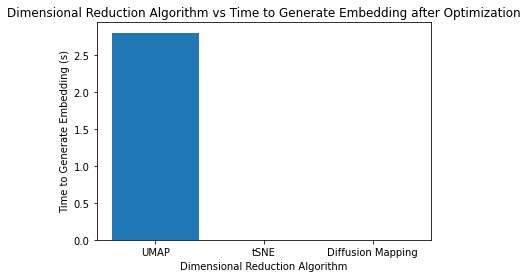

In [11]:
plt.bar(["UMAP", "tSNE", "Diffusion Mapping"], [2.8, 0, 0])
plt.title("Dimensional Reduction Algorithm vs Time to Generate Embedding after Optimization")
plt.xlabel("Dimensional Reduction Algorithm")
plt.ylabel("Time to Generate Embedding (s)")